# 🦉COSADAMA Introduction to Data Science Study

- 일자: 2020-04-23
- 발표자: 박하람 
- 데이터 분석 입문(코사다마)의 첫번째 화상회의

## 1. [프로젝트] 서울시 구별 CCTV 현황 분석

**서울시 구별 CCTV 현황 분석**에서는 단순히 어디에서 CCTV가 많이 설치됐는지부터 시작해서 구별 인구 대비 비율을 확인하는 것까지 진행합니다. 특히 인구 현황을 보면서 구별 인구 현황도 확인하고, 구별 CCTV 현황을 시각화하는 것까지 해볼 겁니다. 

### 1.1 데이터 수집하기 

목적은 서울시 구별 CCTV 분석을 하는 것. 첫번째로 서울시 자치구 CCTV 설치 현황 자료가 필요하고, 두번째로 서울시 구별 인구가 필요함. 

- [서울시 자치구 연도별 CCTV 설치 현황](https://data.seoul.go.kr/dataList/OA-2734/C/1/datasetView.do)
- [서울시 주민등록인구 통계](https://data.seoul.go.kr/dataList/419/S/2/datasetView.do)
- 활용한 데이터들은 모두 **2015년** 데이터!

### 1.2 데이터 가공하기 

#### pandas와 numpy import하기

In [1]:
import pandas as pd    
import numpy as np

In [2]:
CCTV_Seoul = pd.read_csv('01. CCTV_in_Seoul.csv', 
                        encoding='UTF-8')
CCTV_Seoul.head()  # 데이터 앞의 5줄만 보여주세요!

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


강남구가 다른 곳에 비해서 많이 설치되어있네. 추이도 볼 수 있는데, 설치수가 줄어든 것도 보이고 늘어난 곳도 보이네요. 

그런데 구의 column이름이 '기관명'으로 되어 있어서 이걸 '구별'로 바꿔볼게요!

In [3]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, 
                  inplace=True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


그럼 서울인구수가 담긴 엑셀 데이터도 읽어볼게요. 

In [4]:
pop_Seoul = pd.read_excel('01. population_in_Seoul.xls', 
                          header= 2,                       # header는 row 2번째줄로!
                          usecols = 'B, D, G, J, N',       # 요 columns만 가져온다!
                          inplace=True, encoding='utf-8')  
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


CCTV 자료는 CCTV_Seoul에 있고, 서울인구 자료는 pop_Seoul에 있잖아요. 그러면 나중에 이 데이터를 합치게 될 거에요. 데이터를 합칠 때는 기준이 있는데, 저는 그 기준을 지역구로 하고 싶어요. 그래서 자치구를 '구별'로 바꿔주고 계, 계1, 계2, 65세이상고령자를 변수의 특성이 더 잘 나타나는 데이터로 바꾸어주고 싶어요. 

In [5]:
pop_Seoul = pop_Seoul.rename(columns={pop_Seoul.columns[0] : '구별',
                                      pop_Seoul.columns[1] : '인구수',
                                      pop_Seoul.columns[2] : '한국인',
                                      pop_Seoul.columns[3] : '외국인',
                                      pop_Seoul.columns[4] : '고령자'})
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


### 1.3 탐색적 데이터 분석하기 

In [6]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


CCTV가 어디에 많이 있고 없는지를 알고 싶어요. 그러면 '소계'가 CCTV 수니까 이를 정렬시켜볼게요.

In [7]:
CCTV_Seoul.sort_values(by='소계', ascending=True).head(5) 

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


보니까 도봉구, 마포구, 송파구, 중랑구, 중구가 CCTV 수로 하위 TOP5네요.

반대로 CCTV가 많이 설치되어 있는 TOP5 구들을 봅시다.

In [8]:
CCTV_Seoul.sort_values(by='소계', ascending=False).head(5) 

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


상위 5구로는 강남구, 양천구, 서초구, 은평구, 용산구가 나오게 됩니다. 

그 다음 살펴볼 것이 **3년간 CCTV 증가율**이에요. CCTV 데이터에 연도 데이터도 함께 있으니까 최근 증가율도 살펴볼 수 있어요. 
- (최근 3년간 CCTV 증가율) = (2014년 + 2015년 + 2016년) / (2013년도 이전)* 100 

In [9]:
# 최근 3년간 CCTV 설치 증가율
CCTV_Seoul['최근증가율'] = ((CCTV_Seoul['2014년'] + CCTV_Seoul['2015년'] 
                       + CCTV_Seoul['2016년']) / CCTV_Seoul['2013년도 이전']) * 100
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


엇, 보니까 종로구가 정말 많이 증가했네요. 도봉구, 마포구도 그렇구요. 

#### 결측치 확인하기

In [10]:
pop_Seoul[pop_Seoul['구별'].isnull()] 

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [11]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


26번 인덱스에서 결측치가 있고, 0번째 합계 필요없으니 삭제! 

In [12]:
pop_Seoul = pop_Seoul.drop([0, 26])
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [13]:
pop_Seoul[pop_Seoul['구별'].isnull()] 

,구별,인구수,한국인,외국인,고령자


#### 데이터 탐색하기 

고령자비율과 외국인비율이 CCTV 설치율이 얼마나 연관이 있는지를 살펴볼 것입니다.

In [14]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100 #외국인비율 칼럼 생성
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100 #고령자비율 칼럼 생성
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [15]:
pop_Seoul.sort_values(by='인구수', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [16]:
pop_Seoul.sort_values(by='외국인', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [17]:
pop_Seoul.sort_values(by='외국인비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [18]:
pop_Seoul.sort_values(by='고령자', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [19]:
pop_Seoul.sort_values(by='고령자비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


#### 데이터 병합하기 

인구 대비 CCTV 현황을 파악하기 위해 두개의 데이터를 합칩니다.

In [20]:
# data_result라는 새로운 변수에 담아줄게요! 
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


#### 데이터 삭제하기 

그러면 이제 분석에 필요없는 칼럼들을 지워봅시다. 보니까 '2013년도 이전','2014년','2015년','2016년'은 필요하지 않네요!

In [21]:
data_result = data_result.drop(['2013년도 이전','2014년','2015년','2016년'],1)
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


#### 인덱스 만들기 

후에 우리가 표로 시각화해서 나타낼 것인데요, 보통 표는 x축과 y축으로 되어있죠. 그래서 표를 나타날 때 인덱스와 컬럼명이 x나 y축으로 들어가게 되어요.

In [22]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


### 1.4 상관계수 분석 

상관관계는 관계를 알고자 하는 두 변수가 모두 연속변수일 경우에만 계산이 가능하고, 이는 인과관계를 분석하는게 아닌 두 연속변수가 관련이 있는지 없는지를 알아보는 기술통계 분석! 두 변수를 x,y라고 하면 상관관계 계수(coefficient)는 x값과 y값을 모두 z값으로 표준화해서 Zx * Zy를 모두 더한다음, n(총 개수)으로 나눠준 것이 상관계수에요.

- 0 ~ 0.2 : 매우 약한 상관관계 
- 0.2 ~ 0.4 : 약한 상관관계 
- 0.4 ~ 0.6 : 어느 정도의 상관관계 
- 0.6 ~ 0.8 : 강한 상관관계 
- 0.8 ~ 1.0 : 매우 강한 상관관계 

In [23]:
# 약한 음의 상관관계 
np.corrcoef(data_result['고령자비율'], data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [24]:
# 상관관계가 거의 없다고 할 수 있음. 
np.corrcoef(data_result['외국인비율'], data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [25]:
# 0.3이어서 약한 상관관계 
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

엇, 보니까 외국인비율은 거의 상관관계가 없다고 할 수 있고, 여기서 그래도 유의미한 것은 '인구수'네요! 그럼 CCTV와 인구수의 관계를 더 들여다볼게요!

In [26]:
data_result.sort_values(by='소계', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [27]:
data_result.sort_values(by='인구수', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


### 1.5 시각화

In [28]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [29]:
import platform 

from matplotlib import font_manager, rc 
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')

In [30]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


#### bar 그래프 그리기 

구별 CCTV 설치수를 알고 싶다!

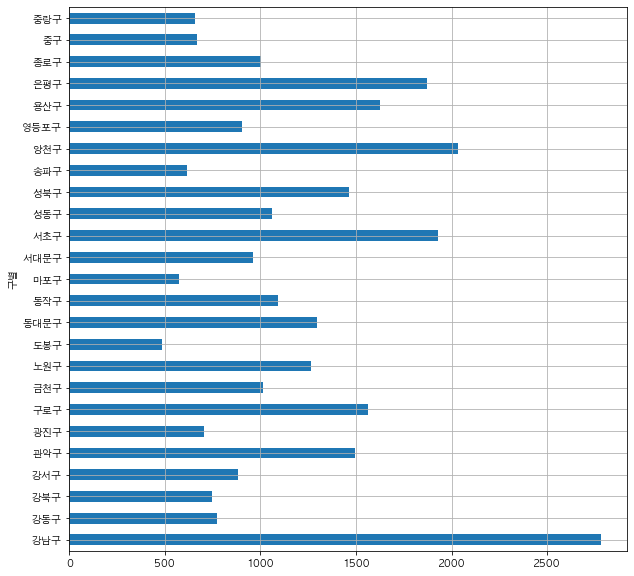

In [31]:
data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

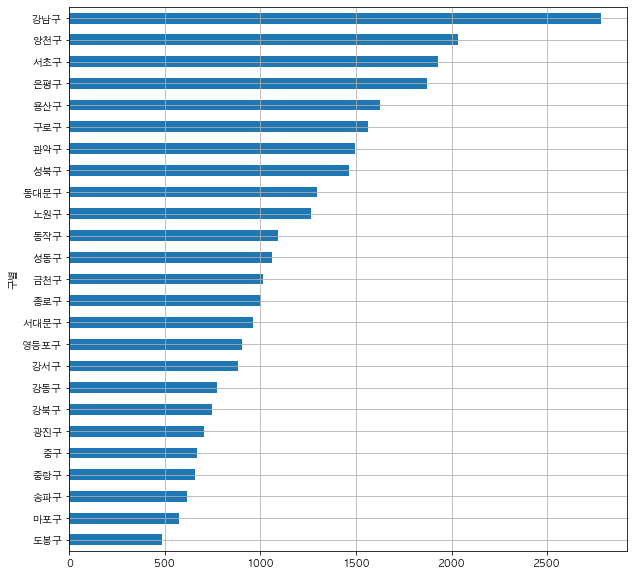

In [32]:
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

보니까 강남구가 월등하게 CCTV 설치수가 많고, 그 다음에는 양천구, 서초구, 은평구 순으로 많습니다. 가장 수가 적은 곳은 도봉구이고, 중구, 중랑구, 송파구, 마포구가 CCTV 설치수가 상대적으로 낮은 곳이네요.

그렇지만 CCTV 수가 많은 것만 보면 안되죠. 지역구가 다른 곳에 비해 상대적으로 넓다거나, 인구 수가 많아서 CCTV를 더 많이 설치했을 수도 있잖아요. 그래서 우리는 인구 대비 CCTV 비율을 계산해서 다시 시각화해볼게요.

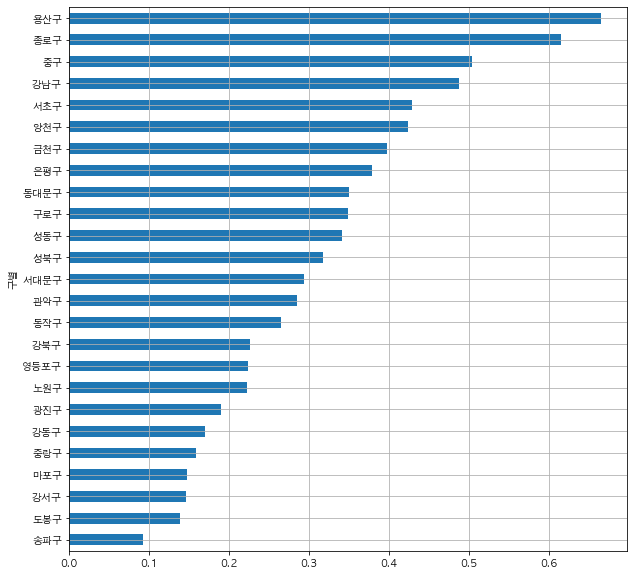

In [33]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100
data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))

plt.show()

#### 산점도 그리기 

인구수와 CCTV 수의 산점도 그리기

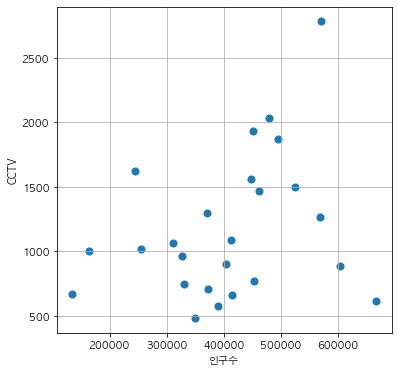

In [34]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

인구수를 보면 x축이 100,000부터 시작해 700,000까지! 

#### 선형 회귀선 그리기

넘파이의 **polyfit 함수**를 사용해서 만들어줄 거에요. polyfit()은 **n차 다항식으로 회귀분석을 할 때 사용하는 함수**에요.

- np.polyfit(x, y, n): x는 x에 들어갈 데이터, y는 y에 들어갈 데이터, n는 다항식의 차수

우리가 그리고 싶은 추세선은 직선이라 y=ax+b라고 하죠. 직선은 1차원이니까 n=1이고, polyfit의 결과값은 [a,b]가 나오게 되어요. 즉, 기울기와 절편값이 나오는거죠. 우리가 사통론에서 요 a,b값을 구하려고, 일일이 하나씩 다 계산해서 정말 힘들게 계산했잖아요. 그런데 이렇게 polyfit()을 사용하면 바로 기울기와 절편값을 줍니다. 2,3,4 등 n차원까지 모두 가능해요.

In [35]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'],1)
fp1

array([1.30916415e-03, 6.45066497e+02])

**poly1d는 다항식(polynomial function)을 정의해주는 함수**에요. 즉, 우리가 poly1d() 안에 [a,b]를 넣는다면, ax+b라는 1차 방정식을 넣어주는거죠. 만약 poly1d([1,2,3])이라면 x^2+2x+3을 만들어주는 것이구요.

In [36]:
f1 = np.poly1d(fp1)

f1 자체가 방정식이니까, 직선을 만드려면 x값을 공급해줘야해요. 그 x값은 np.linspace로 만들어 줄 거에요.
- np.linspace(start, stop, num): num은 데이터 개수


In [37]:
fx = np.linspace(100000, 700000, 100)

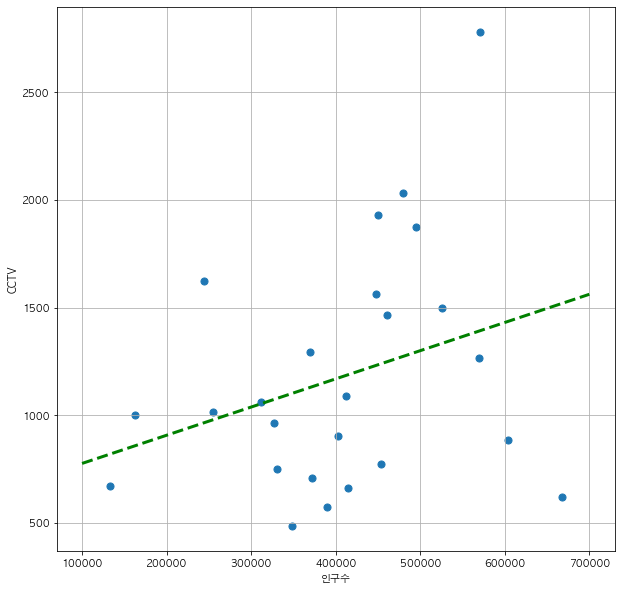

In [38]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

/Users/harampark/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/harampark/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/harampark/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/harampark/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/harampark/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)


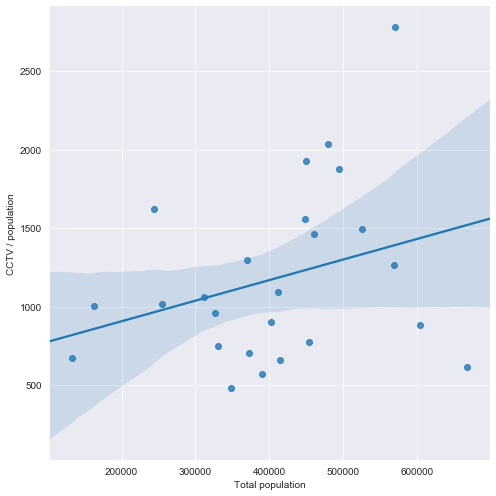

In [39]:
import seaborn as sns

sns.set_style("darkgrid")
sns.lmplot(x="인구수", y="소계", data=data_result, height=7)

plt.xlabel('Total population')
plt.ylabel('CCTV / population')
plt.show()

두가지 장치를 더해, 하나는 직선의 경향에서 멀어진 구일수록 색이 변한다는 것과, 다른 하나는 경향에서 멀어진 구의 이름을 표시하고 싶다는 거에요. 그래서 이를 표시하기위해 오차를 계산하는 코드를 만들었어요. 

- 오차 = |(CCTV수) - f1(인구수)|

엇, 이거 우리 회귀분석할 때 선형 회귀식을 만들 때 봤죠? 아까 우리가 추세선을 만들었잖아요. 그 추세선이 바로 **회귀식**이랍니다. **오차는 회귀선을 통해서 나온 y값과 실제 y값의 차이**잖아요. 그래서 요거를 이용해서 오차를 계산해 data_result에다 새로운 컬럼으로 넣어주어봤습니다.

In [40]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'],1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

# 오차 칼럼 만들어주기 
data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.170552,465.422892
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.226535,329.342026
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413,551.503155
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.284673,162.948104


오차를 기준으로 정렬!

In [41]:
df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


그럼 이제 텍스트와 color map을 입혀볼게요. 

- color는 plt.scatter()의 c 옵션값으로 넣어줬어요. 
- plt.text(x, y, s): x와 y는 (x,y)위치(the position to place the text), s는 넣어줄 텍스트(the text)

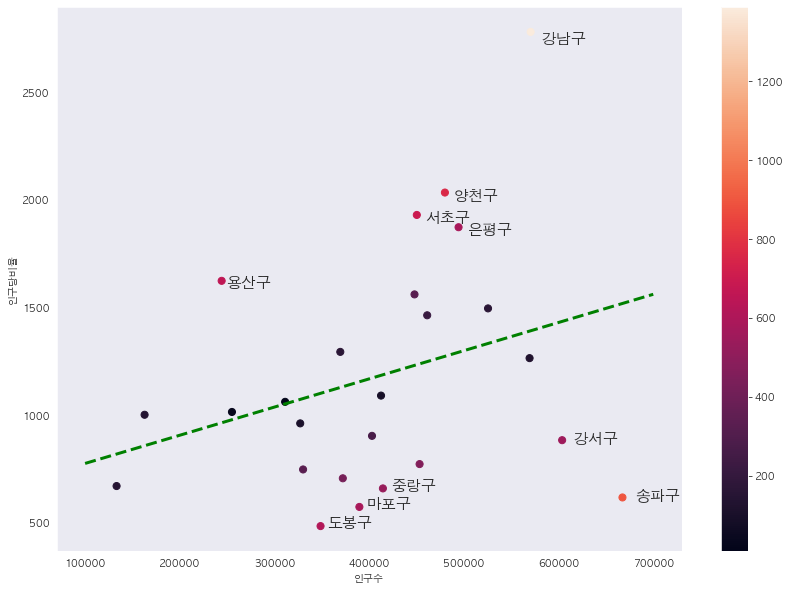

In [42]:
# seaborn 한글폰트 
plt.rcParams['font.family'] = 'AppleGothic'

plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'],
           c=data_result['오차'], s=50)                   #c=marker color, s=marker size
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')       #lw=line width

# 텍스트 만들어주기
for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98,   
            df_sort.index[n], fontsize=15)

plt.xlabel('인구수')
plt.ylabel('인구당비율')

plt.colorbar()
plt.grid()
plt.show()

#### 지도 시각화 하기 

In [43]:
# json 파일 로딩하기 
import json
geo_path = '02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [44]:
import folium

map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

map.choropleth(geo_data = geo_str,
              data = data_result['CCTV비율'],
              columns = [data_result.index, data_result['CCTV비율']],
              fill_color = 'YlGnBu',
              key_on = 'feature.id')

map

/Users/harampark/opt/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


### 1.6 분석 결과 

'강남구', '양천구', '서초구', '은평구', '용산구'는 서울시 전체 지역의 일반적인 경향보다 CCTV가 많이 설치된 지역이네요. 그리고 '송파구','강서구','중랑구','마포구','도봉구'는 일반적인 경향보다 CCTV가 적게 설치된 지역이고요. 특히 '강남구'는 월등히 많은 CCTV가 설치됐지만, '송파구'는 인구수에 비해 너무나도 적은 수의 CCTV를 가지고 있네요!
